# Notebook accompaning Chapter 3 from 


* Discovering knowledge in data : an introduction to data mining / Daniel T. Larose

This notebook shows how we can do all things described in this chapter rather easily inside `pandas`.


In [143]:
import pandas as pd
%matplotlib inline
import seaborn as sb

In [2]:
ls www.sgi.com/tech/mlc/db/churn*

www.sgi.com/tech/mlc/db/churn.all    www.sgi.com/tech/mlc/db/churn.data   www.sgi.com/tech/mlc/db/churn.names  www.sgi.com/tech/mlc/db/churn.test


In [3]:
!head www.sgi.com/tech/mlc/db/churn.all

KS, 128, 415, 382-4657, no, yes, 25, 265.1, 110, 45.07, 197.4, 99, 16.78, 244.7, 91, 11.01, 10, 3, 2.7, 1, False.
OH, 107, 415, 371-7191, no, yes, 26, 161.6, 123, 27.47, 195.5, 103, 16.62, 254.4, 103, 11.45, 13.7, 3, 3.7, 1, False.
NJ, 137, 415, 358-1921, no, no, 0, 243.4, 114, 41.38, 121.2, 110, 10.3, 162.6, 104, 7.32, 12.2, 5, 3.29, 0, False.
OH, 84, 408, 375-9999, yes, no, 0, 299.4, 71, 50.9, 61.9, 88, 5.26, 196.9, 89, 8.86, 6.6, 7, 1.78, 2, False.
OK, 75, 415, 330-6626, yes, no, 0, 166.7, 113, 28.34, 148.3, 122, 12.61, 186.9, 121, 8.41, 10.1, 3, 2.73, 3, False.
AL, 118, 510, 391-8027, yes, no, 0, 223.4, 98, 37.98, 220.6, 101, 18.75, 203.9, 118, 9.18, 6.3, 6, 1.7, 0, False.
MA, 121, 510, 355-9993, no, yes, 24, 218.2, 88, 37.09, 348.5, 108, 29.62, 212.6, 118, 9.57, 7.5, 7, 2.03, 3, False.
MO, 147, 415, 329-9001, yes, no, 0, 157, 79, 26.69, 103.1, 94, 8.76, 211.8, 96, 9.53, 7.1, 6, 1.92, 0, False.
LA, 117, 408, 335-4719, no, no, 0, 184.5, 97, 31.37, 351.6, 80, 29.89, 215.8, 90, 9.71, 

In [4]:
!head www.sgi.com/tech/mlc/db/churn.names

| Churn data (artificial based on claims similar to real world)

discrete.

state: discrete.
account length: continuous.
area code: continuous.
phone number: discrete.
international plan: discrete.
voice mail plan: discrete.


In [42]:
churndf= pd.read_csv('www.sgi.com/tech/mlc/db/churn.all', header=None)
print churndf.shape
churndf.head()

(5000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Regression

In [1]:
from pandas.stats.api import ols
res = ols(y=churndf[9], x=churndf[7])
res

NameError: name 'churndf' is not defined

In [15]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(churndf[9],churndf[7])
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.191e+11
Date:                Wed, 11 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:23:55   Log-Likelihood:                 22165.
No. Observations:                5000   AIC:                        -4.433e+04
Df Residuals:                    4999   BIC:                        -4.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
7              0.1700   2.16e-07   7.87e+05      0.0

# DEALING WITH CORRELATED VARIABLES

### Your turn

1. Add the column names as in the book to `churndf`
1. Create the scatterplots in Figure 3.2
    * We can also add the regression line, can't we? Let's do that! 
2. Remove the 4 columns from churndf which are also removed in the book.
3. Can you understand the differences between the two methods used above? In the end, which is better? Why?

# EXPLORING CATEGORICAL VARIABLES


* We are going to look at the distribution of the churn variable.
* This is a Boolean variable, so we want it to be of Boolean type.
* Here we just show how easy it is to get the same data as we see in Figures 

In [43]:
churndf[20].head()

0     False.
1     False.
2     False.
3     False.
4     False.
Name: 20, dtype: object

In [36]:
churndf[20].value_counts()

 False.    4293
 True.      707
Name: 20, dtype: int64

In [45]:
(churndf[20].str.strip()=='True.').head(15)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
Name: 20, dtype: bool

In [46]:
print (churndf[20].str.strip()=='True.').sum()


707


In [51]:
# Set churndf[20] to a Boolean type with boolean values
churndf[20]=(churndf[20].str.strip()=='True.')
churndf[20].head()

0    False
1    False
2    False
3    False
4    False
Name: 20, dtype: bool

In [72]:
# percentages taking the international plan
churndf[4].value_counts()/len(churndf) *100

 no     90.54
 yes     9.46
Name: 4, dtype: float64

# Figure 3.6

In [52]:
pd.crosstab(churndf[4],churndf[20])

20,False,True
4,,
no,4019,508
yes,274,199


In [69]:
churndf.pivot_table(index=4, columns=20, values= 1,aggfunc=len)

20,False,True
4,,
no,4019,508
yes,274,199


# Comparing the relative frequencies for the two classes

* We want to see which percentage of the Int Plan holders churns, and which percentage of the non Int plan holders churns.
* Sounds easy eh, just divide the above dataframe by `churndf[4].value_counts()`
* But we have to make sure division occurs correctly...
* Use **transpose** (`.T`) to transpose the dataframes

In [89]:
((pd.crosstab(churndf[4],churndf[20])).T / churndf[4].value_counts()).T

20,False,True
4,,
no,0.887784,0.112216
yes,0.579281,0.420719


# Your turn

1. Turn all Boolean columns into real Boolean columns.
2. Use the `mean` method on those Boolean columns. What does the mean mean?
3. Do the same for the VoiceMail Plan.

# Figure 3.9

Now we want to compare 3 variables! 

* First we do it with a crosstab. That is clear.
* Below we do it with a pivot_table, which is really interesting.
    * We give the Int Plan and the Voice Plan as index and columns
    * This means we are interested in these 4 cells.
    * Now we say that for each cell, we want to have the _mean_ of the churn column (column 20)
        * We get the mean, because that is the default function for the pivot table
        * That is great, because now we see the different churn ratios!
        
## Your turn
* Figure out why we get different numbers than the onse used in the book. 
* Maybe load another churn dataset?

In [93]:
pd.crosstab([churndf[4],churndf[5]],churndf[20])

20         False  True 
4    5                 
 no   no    2883    452
      yes   1136     56
 yes  no     189    153
      yes     85     46

In [96]:
churndf.pivot_table(index=4, values=20,  columns=5)

5,no,yes
4,,
no,0.135532,0.046980
yes,0.447368,0.351145


# USING EDA TO UNCOVER ANOMALOUS FIELDS

### Your turn

1. Reproduce Figure 3.12, both with absolute numbers and percentages.
2. Reproduce Figure 3.13

# EXPLORING NUMERICAL VARIABLES

* `churndf.describe()` is a first great start.
* Want Pearson correlations? Simply do `churndf.corr()`

### Your turn

**Hint** Try out `churndf.corr().round(2)`

1. Discover the correlations which are 1 but are not on the diagonal.
    * give a oneliner which counts how many there are of these.
    * give a onliner which returns a Boolean Series with the column names as indexes and with a True value if the column contains more than one perfect correlation.
    * **Bonus** Print the combinations of variables which give perfect combinations, without identical pairs and without symmtric pairs. 

# Figures 3.16-3.18

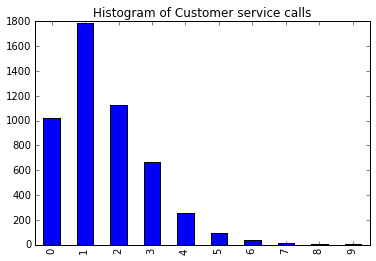

In [142]:
churndf[19].value_counts().sort_index().plot(kind='bar', title='Histogram of Customer service calls');

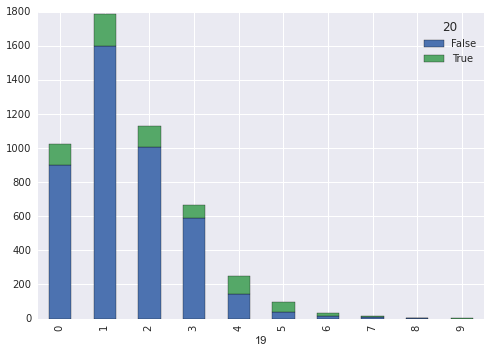

In [144]:
#http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

pd.crosstab(churndf[19],churndf[20]).plot.bar(stacked=True);

# Your turn: figure 3.18

1. Inspect `pd.crosstab(churndf[19],churndf[20])`
2. You want to divide the cells in each row by the row total
3. We have done that before.
4. Do it, and use the same plotting command.

Try out this code

```
ef= pd.crosstab(churndf[19],churndf[20])
print ef.sum(axis=1)
print ef.T.sum()
```

# Your turn: generalize to a function

Create a function which makes a stacked histogram like 3.18 and use it to create those histograms for all variables as is done in the book in Figures 3.19 to 3.21.
* Of course you make sure that the titles contain the name of the variable, and all looks very nice.
* Think about how general you want the function. 
    * Why not let it work for any dataframe? Do it! 

# EXPLORING MULTIVARIATE RELATIONSHIPS

### Figure 3.23

* Here we look ate the effect of two variables together on churn
* We first plot the scatter plot for the two variables
* Then we plot the same scatter twice, but restrict the rows to the churn and the not churn customers

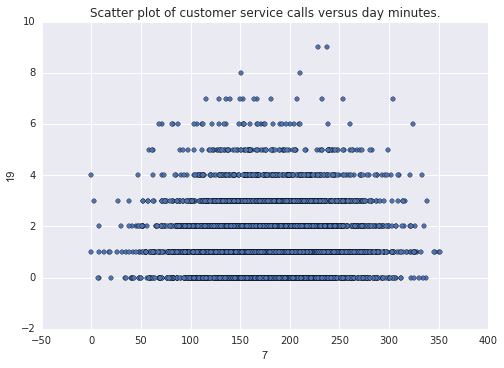

In [146]:
churndf.plot.scatter(x=7,y=19, title='Scatter plot of customer service calls versus day minutes.');

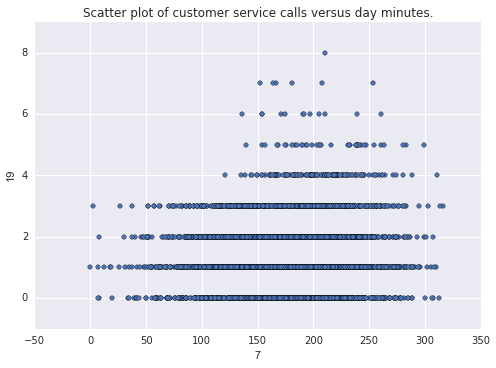

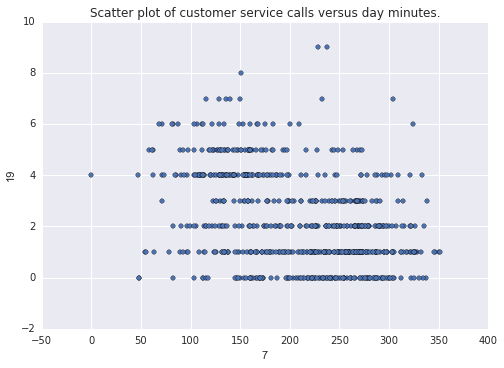

In [152]:
churndf[churndf[20]!=True].plot.scatter(x=7,y=19, title='Scatter plot of customer service calls versus day minutes.');
churndf[churndf[20]==True].plot.scatter(x=7,y=19, title='Scatter plot of customer service calls versus day minutes.');

# BINNING

* We bin day minutes into three bins

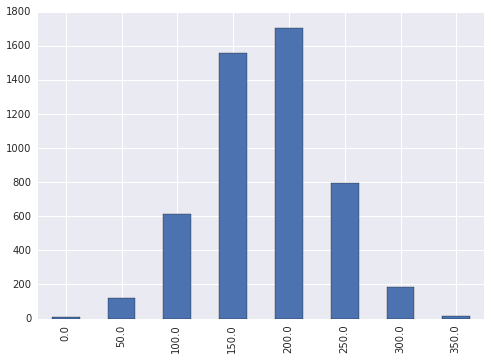

In [171]:
# First let's look at day minutes again

((churndf[7]/50).round()*50).value_counts().sort_index().plot(kind='bar');

In [169]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

churndf['BinnedMinutes']=pd.cut(churndf[7], 3, labels=["low","medium","high"])

churndf.BinnedMinutes.value_counts()

medium    3615
high       787
low        598
Name: BinnedMinutes, dtype: int64

In [170]:
churndf[[7,'BinnedMinutes']].head(10)

,7,BinnedMinutes
0,265.1,high
1,161.6,medium
2,243.4,high
3,299.4,high
4,166.7,medium
5,223.4,medium
6,218.2,medium
7,157.0,medium
8,184.5,medium
9,258.6,high


,min,max
BinnedMinutes,,
low,0.0,117.1
medium,117.2,234.3
high,234.4,351.5


# Your turn


1. What does this command give us?
    * `churndf.pivot_table(index='BinnedMinutes',values=7, aggfunc=[min,max])`
    * Understand why it works like that? 
    * Experiment with more bins
* Visualize the information in Figures 3.26 and 3.27, but possibly in a better and easier to understand manner.



# Your turn

* Do all exercises from chapter 3.
* Create two new notebooks and copy the questions nicely in markdown before the cells with your answer.